## This notebook illustrates unfolding using the RooUnfold methods 

In [2]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [3]:
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex

/mnt/c/Users/marratia/Linux/buildroot/lib/ROOT.py:579: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


In [4]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')


0L

In [5]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [6]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [8]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [9]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [10]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [11]:
df = getData(['data.root'])
df = applyCuts(df)

mc = getData(['mc.root'])
mc = applyCuts(mc)


Processed data.root in 0.4 seconds
0.2 < y < 0.7 170849  fraction kept: 100.0
Q2>150 170849  fraction kept: 100.0
e_pt >10 137246  fraction kept: 80.3

Processed mc.root in 0.1 seconds
0.2 < y < 0.7 118567  fraction kept: 100.0
Q2>150 118567  fraction kept: 100.0
e_pt >10 97889  fraction kept: 82.6


In [12]:
df_jet      = getJetData(['data.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['mc.root'],isMC=True)
mc_jet = applyCutsJets(mc_jet, isMC=True)


Processed data.root in 2.7 seconds
0.2 < y < 0.7 82882  fraction kept: 100.0
Q2>150 82882  fraction kept: 100.0
e_pt >10 70103  fraction kept: 84.6
jet_pt>5 70103  fraction kept: 100.0

Processed mc.root in 3.1 seconds
0.2 < y < 0.7 145313  fraction kept: 100.0
Q2>150 145313  fraction kept: 100.0
e_pt >10 125072  fraction kept: 86.1
jet_pt>5 125072  fraction kept: 100.0


In [14]:
eptmin = 15
eptmax = 20
data_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
print len(mc_cut)
msk = np.random.rand(len(mc_cut)) < 0.5
mctest_cut = mc_cut[msk]
mc_cut   = mc_cut[~msk]
print len(mctest_cut)
print len(mc_cut)

29316
14589
14727


In [16]:
coarsebins = 10
finebins = 10
#minval = 2.5
#maxval = np.pi
#variable    = 'jet_dphi' 
#genvariable = 'genjet_dphi'

#minval = 0.0
#maxval = 10
#variable = 'jet_qt'
#genvariable = 'genjet_qt'

#minval = 0.0 
#maxval = 1.0
#variable = 'jet_qtnormept'
#genvariable = 'genjet_qtnormept'

minval = 0.0
maxval = 0.50
variable = 'jet_qtnormjetpt'
genvariable = 'genjet_qtnormjetpt'
namevariable = r'$q_{T}/p_{T}^{jet}$'

#minval = 0
#maxval = 1.0
#variable = 'jet_z'
#genvariable = 'genjet_z'
#namevariable = r'$z_{jet}$'


binwidth = (maxval - minval)/coarsebins

M = ROOT.TH2D("M", "Response Matrix", coarsebins,minval,maxval, finebins,minval,maxval)
M1 = M.Clone("M1")
M2 = M.Clone("M2")
M1.SetTitle("+1#sigma")
M2.SetTitle("-1#sigma")

scaleup = 1.001
scaledn = 0.999

eptmin = 15
eptmax = 20

<function matplotlib.pyplot.hist>

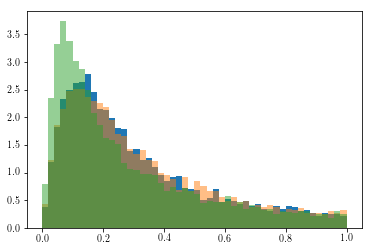

In [17]:
plt.hist(data_cut[variable],range=(0,1),bins=50,normed=True)
plt.hist(mc_cut[variable],range=(0,1),bins=50,normed=True,alpha=0.5)
plt.hist(mc_cut[genvariable],range=(0,1),bins=50, normed=True,alpha=0.5)

plt.hist

(array([2.26925204, 4.34570631, 3.51246506, 2.47534641, 1.92576189,
        1.46703566, 1.2055406 , 1.11911331, 0.81772882, 0.86204966]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ],
       dtype=float32),
 <a list of 10 Patch objects>)

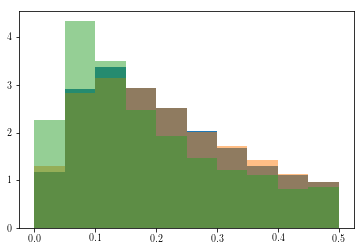

In [18]:
plt.hist(data_cut[variable],range=(0,maxval),bins=coarsebins,normed=True)
plt.hist(mc_cut[variable],range=(0,maxval),bins=coarsebins,normed=True,alpha=0.5)
plt.hist(mc_cut[genvariable],range=(0,maxval),bins=coarsebins, normed=True,alpha=0.5)


In [20]:
Npe = len(mc_cut[variable])

for i in np.arange(len(mc_cut[variable])):
    x = mc_cut.iloc[i][variable]
    y = mc_cut.iloc[i][genvariable]
    M.Fill(x, y, 1./Npe)
#
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)


In [ ]:
h_fakedata = ROOT.TH1D("h_fakedata", "h_fakedata", finebins, minval, maxval)   
    
for i in np.arange(len(mctest_cut[variable])):
    h_fakedata.Fill(mctest_cut.iloc[i][variable])
    
    
    
h_data = ROOT.TH1D("h_data", "h_data", finebins, minval, maxval)   
for i in np.arange(len(data_cut[variable])):
    h_data.Fill(data_cut.iloc[i][variable])
    
h_mcreco = ROOT.TH1D("h_mcreco", "h_mcreco", finebins, minval, maxval)
h_mctrue = ROOT.TH1D("h_mctrue", "h_mctrue", finebins, minval, maxval)

   
for i in np.arange(len(mc_cut[variable])):
    h_mctrue.Fill(mc_cut.iloc[i][genvariable])
    h_mcreco.Fill(mc_cut.iloc[i][variable])


In [19]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature#Derivative#Curvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

u = ROOT.MyTUnfoldDensity(M,orientation,regMode,con)
u.SetInput( hdata )
u.AddSysError(M1, "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.AddSysError(M2, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
#ROOT.TUnfoldDensity.kSysErrModeRelative)# ROOT.TUnfoldDensity.kSysErrModeShift)

NameError: name 'hdata' is not defined

Setup (My)TUnfoldDensity


Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 12 output bins do not depend on the input data  0-11
Info in <TUnfold::TUnfold>: 10 input bins and 0 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (xaxis:[0,0.05])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #2 (xaxis:[0.05,0.1])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #3 (xaxis:[0.1,0.15])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #4 (xaxis:[0.15,0.2])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #5 (xaxis:[0.2,0.25])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (xaxis:[0.25,0.3])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (xaxis:[0.3,0.35])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (xaxis:[0.35,0.4])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:[0.4,0.45])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfo

In [ ]:
# Regularize
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)

In [ ]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

In [ ]:
# Get output... DOES NOT CONTAIN SYSTEMATICS. 
o = u.GetOutput("o")

# Get systematic shifts of output
o_up = u.GetDeltaSysSource("Up", "o_upshift", "+1#sigma")
o_dn = u.GetDeltaSysSource("Dn", "o_dnshift", "-1#sigma")
o_up.SetLineStyle(2)
o_dn.SetLineStyle(2)

In [ ]:
ROOT.gStyle.SetOptStat("")

# Get various covariances
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
o_unfunc = o.Clone("o_unc")        # Unfolding and stat unc
o_sys = o.Clone("o_sys")        # Syst uncertainty
o_unctot = o.Clone("o_unctot")  # Total uncertainty
o_sys.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output
for i in range( 0, o.GetNbinsX() + 1):
    unc_tot = ROOT.TMath.Sqrt( cov.GetBinContent(i,i) )
    o_unctot.SetBinContent(i, unc_tot )    
    o.SetBinError(i, unc_tot )
    
    yup = abs( o_up.GetBinContent(i))
    ydn = abs( o_dn.GetBinContent(i))
    dy = ROOT.TMath.Sqrt( (yup**2 + ydn**2) )
    o_sys.SetBinContent(i, dy )


htrue2 = htrue.Clone("h2")
hdata2 = hdata.Clone("hdata2")

hdata2.Rebin(finebins//coarsebins)

htrue2.Rebin(finebins//coarsebins)
o.SetMarkerStyle(20)
o.SetMarkerColor(1)
o_unfunc.SetMarkerStyle(0)
o_unfunc.SetLineColor(2)
htrue2.SetMarkerStyle(21)
htrue2.SetMarkerColor(4)
htrue2.SetMarkerStyle(4)
htrue2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
#o.SetMinimum(0.0)
#o.SetMaximum(0.40)

o.DrawNormalized()
#o_unfunc.DrawNormalized("e same")
htrue2.DrawNormalized("e same")
hdata2.SetMarkerColor(2)
hdata2.SetLineColor(2)

hdata2.DrawNormalized("e same")
leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry( o, "Unfolded, total unc",'p')
leg2.AddEntry(hdata, "Reco", 'p')
#leg2.AddEntry( o_unfunc, "stat+unfolding unc",'l')
leg2.AddEntry( htrue2, "True",'p')
#o.SetMinimum(1)
#c.SetLogy()
#gStyle.SetOptStat("")
c.Draw()

In [ ]:
ROOT.gStyle.SetOptStat("")

c2 = ROOT.TCanvas("c2", "c2", 500, 500)
closure = htrue2.Clone("closure")
closure2 = htrue2.Clone("closure2")
closure.SetMarkerColor(1)
closure.SetLineColor(1)
closure2.SetMarkerColor(2)
closure2.SetLineColor(2)
closure.SetTitle("true / unfolded")
closure.Divide(o)
closure2.Divide(o_unfunc)
closure.Draw('e1')
closure2.Draw('e1 same')
closure.SetMaximum(1.5)
closure.SetMinimum(0.5)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry( closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry( closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

In [ ]:

ccov = ROOT.TCanvas("ccov", "Covariance Matrix", 400, 400)
cov.Draw('colz')
ccov.SetLogz()
ccov.Draw()